In [0]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [0]:
c5, c1, c0, D = sympy.symbols(["c5", "c1", "c0", "D"])

function = c5*D**5 + c1*D + c0

values = {c5: 1000, c1: -3, c0: 9.04}
function = function.subs(values)

f = lambda y: sympy.lambdify(D, function, 'numpy')(y)
fp = lambda y: sympy.lambdify(D, sympy.diff(function, D), 'numpy')(y)

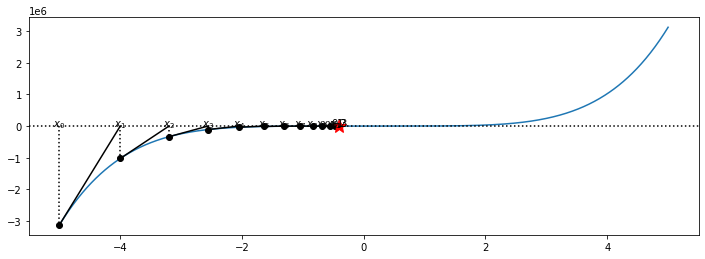

In [7]:
X = np.linspace(-5, 5, 800)
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(X, f(X))
ax.axhline(0, ls=':', color='k')

tol = 0.01
x_inicial = -5
n = 0

while abs(f(x_inicial)) > tol:
    x_new = x_inicial - f(x_inicial) / fp(x_inicial)

    ax.plot([x_inicial, x_inicial], [0, f(x_inicial)], color='k', ls=':')
    ax.plot(x_inicial, f(x_inicial), 'ko')
    ax.text(x_inicial, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([x_inicial, x_new], [f(x_inicial), 0], 'k-')

    x_inicial = x_new
    n += 1

ax.plot(x_inicial, f(x_inicial), 'r*', markersize=15)